## Занятие 7
## Математический анализ
## Исследование функции с sympy.calculus.util и sympy.calculus.singularities

In [1]:
import sympy
from sympy import S, Interval, plot
from sympy import sin as Sin
from sympy import pi as Pi
from sympy.calculus.util import continuous_domain, function_range, periodicity, stationary_points, maximum, minimum, AccumBounds
from sympy.calculus.singularities import singularities, is_increasing, is_decreasing, is_monotonic
from sympy.calculus.singularities import is_strictly_increasing, is_strictly_decreasing
%matplotlib inline

Анализ функции в sympy автоматизируется с помощью пакета sympy.calculus, в частности sympy.calculus.util и sympy.calculus.singularities.

В sympy.calculus реализованы функции, позволяющие находить область определения функции, сингулярные точки (точки, в которых функция не существует), область значений, интервал значений непрерывной функции на некотором интервале, стационарные точки и точки экстремума, а также определять, является ли функция монотонной на заданном интервале. 

Класс sympy.calculus.util.AccumulationBounds служит для вычисления интервала значений непрерывной функции на некотором промежутке, быть может, бесконечном. У экземпляров этого класса есть свойства delta, max, min, mid, представляющие соотвественно разность наибольшего и наименьшего значения, наибольшее, наименьшее значения и середину интервала между наибольшим и наименьшим значениями.

## Схема анализа функции.
1. Область определения

sympy.calculus.util.continuous_domain(f, symbol, domain)

f - выражение, описывающее функцию, 

symbol - переменная, от которой зависит исследуемая функция,

domain - область значений переменной, на которой рассматривается функция,

если функция рассматривается на всей вещественной прямой, то domain=S.Reals

Сингулярные точки (точки, в которых функция не существует) находятся с помощью

sympy.calculus.singularities.singularities(f, symbol, domain=None)

2. Область значений

sympy.calculus.util.function_range(f, symbol, domain)

3. Периодичность

sympy.calculus.util.periodicity(f, symbol, check=False)

4. Стационарные точки 

sympy.calculus.util.stationary_points(f, symbol, domain=Reals)

5. Точки экстремума

sympy.calculus.util.maximum(f, symbol, domain=Reals)

sympy.calculus.util.minimum(f, symbol, domain=Reals)

6. Монотонность

sympy.calculus.singularities.is_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_increasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_monotonic(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_increasing(f, interval=Reals, symbol=None)

7. Минимальное и максимальное значение функции на интервале 

sympy.calculus.util.AccumulationBounds(min, max)

Мы будем далее использовать принятое для AccumulationBounds сокращение AccumBounds

Свойства: delta, max, min, mid

### Пример.  Анализ функции и построение графика.
$f(x) = \frac{1}{\sin(2x)}$.

###### 1. Область определения

Для того, чтобы использовать continuous_domain из sympy.calculus.util

from sympy.calculus.util import continuous_domain

In [2]:
from sympy.abc import x
f = 1/Sin(2*x)
D = continuous_domain(f, x, S.Reals)
D

Complement(Reals, Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers)))

Сингулярные точки (точки, где функция не определена)

In [3]:
singularities(f, x)

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))

###### 2. Область значений
sympy.calculus.util.function_range(f, symbol, domain)

In [4]:
function_range(f, x, S.Reals)

Union(Interval(-oo, -1), Interval(1, oo))

###### 3. Периодичность
sympy.calculus.util.periodicity(f, symbol, check=False)

In [5]:
periodicity(f, x, check=False)

pi

Значит, функция периодична с периодом $\pi$.
###### 4. Стационарные точки
sympy.calculus.util.stationary_points(f, symbol, domain=Reals)

In [6]:
stationary_points(f, x)

Union(Complement(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))), Complement(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))), Complement(ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))), Complement(ImageSet(Lambda(_n, 2*_n*pi + pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*

###### 5. Максимальное и минимальное значения функции
maximum(f, symbol, domain=Reals)
minimum(f, symbol, domain=Reals)

In [7]:
display(maximum(f, x), minimum(f, x))

oo

-oo

###### 6. Монотонность

In [8]:
display(is_decreasing(f),
is_increasing(f),
is_monotonic(f),
is_strictly_decreasing(f),
is_strictly_increasing(f))

False

False

False

False

False

###### 7. Минимальное и максимальное значение функции на интервале 

Поскольку наша функция принимает сколь угодно большие значения, положительные и отрицательные, то нет смысла искать минимальное значение и т.п.

Рассмотрим функцию на интервале $[\pi/6, \pi/3]$, для этого интервала найдем интервал значений функции, ее максимальное, минимальное значения, длину и середину интервала от минимального до максимального значения функции.

Свойства: delta, max, min, mid

In [9]:
f_AccB = f.subs(x, AccumBounds(Pi/6, Pi/3))
display(f_AccB, f_AccB.max, f_AccB.min, f_AccB.delta, f_AccB.mid)

AccumBounds(1, 2*sqrt(3)/3)

2*sqrt(3)/3

1

-1 + 2*sqrt(3)/3

1/2 + sqrt(3)/3

## Исследование периодической функции на одном периоде.
Найдем пересечение с интервалом $[0, \pi]$ (период) области определения, множества сингулярных точек и стационарных точек.
###### 1. Область определения

In [10]:
period_pi = Interval(0, Pi)
continuous_domain(f, x, period_pi)

Union(Interval.open(0, pi/2), Interval.open(pi/2, pi))

Сингулярные точки (точки, где функция не определена)

In [11]:
singularities(f, x, period_pi)

FiniteSet(0, pi, pi/2)

###### 2. Область значений

In [12]:
function_range(f, x, period_pi)

Union(Interval(-oo, -1), Interval(1, oo))

4. Стационарные точки 

In [13]:
stationary_points(f, x, period_pi)

FiniteSet(pi/4, 3*pi/4)

5. Максимальное и минимальное значения функции

In [14]:
display(maximum(f, x, period_pi), minimum(f, x, period_pi))

oo

-oo

6. Монотонность

Исследуем на периоде открытые интервалы (Interval.open), на которые период разбивают сингулярные и стационарные точки, т.е. $(0, \pi/4)$, $(\pi/4, \pi/2)$, $(\pi/2, 3\pi/4)$, $(3\pi/4, \pi)$.   

In [15]:
intervals = [Interval.open(k*Pi/4, (k + 1)*Pi/4) for k in range(4)]
for interval in intervals:
    display(interval)
    print(is_monotonic(f, interval=interval), 
            is_decreasing(f, interval=interval), is_increasing(f, interval=interval),
            is_strictly_decreasing(f, interval=interval), is_strictly_increasing(f, interval=interval))

Interval.open(0, pi/4)

True True False True False


Interval.open(pi/4, pi/2)

True False True False True


Interval.open(pi/2, 3*pi/4)

True False True False True


Interval.open(3*pi/4, pi)

True True False True False


7. Минимальное и максимальное значение функции на интервале 

Найдем максимальное и минимальное значение функции на каждом из интервалов монотонности в пределах одного периода

In [16]:
right = 0
for k in range(4):
    left = right
    right = left + Pi/4
    display(Interval.open(left, right))
    f_AccB = f.subs(x, AccumBounds(left, right))
    display(f_AccB, f_AccB.max, f_AccB.min, f_AccB.delta, f_AccB.mid)

Interval.open(0, pi/4)

AccumBounds(1, oo)

oo

1

oo

oo

Interval.open(pi/4, pi/2)

AccumBounds(1, oo)

oo

1

oo

oo

Interval.open(pi/2, 3*pi/4)

AccumBounds(-oo, -1)

-1

-oo

oo

-oo

Interval.open(3*pi/4, pi)

AccumBounds(-oo, -1)

-1

-oo

oo

-oo

Построим график функции на одном периоде и убедимся в соответствии графику информации, полученной при анализе.

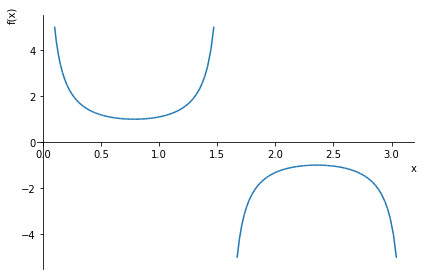

In [17]:
plot((f, (x, 0.1, Pi/2-0.1)), (f, (x, Pi/2 + 0.1, Pi-0.1)))